# Decision Tree

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score
from sklearn.datasets import load_diabetes

## DT- Classifier

In [22]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
le=LabelEncoder()
df.species=le.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df.drop(columns=['sepal_width','petal_width'],inplace=True)

In [25]:
x=df.drop(columns=['species'])
y=df.species

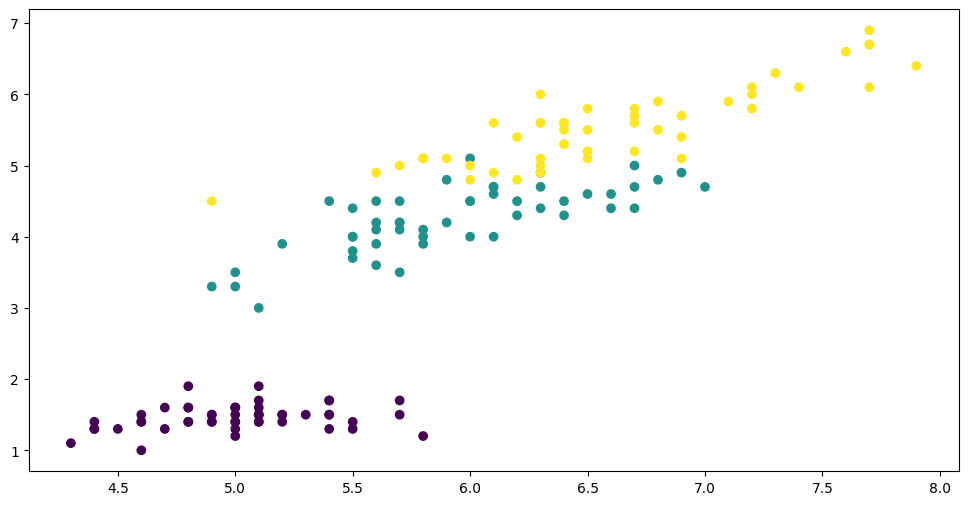

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(x.sepal_length,x.petal_length,c=y)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.9333333333333333

## DT- Regression

In [30]:
df=pd.read_csv('csv/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [31]:
x=df.drop(columns=['Strength'])
y=df.Strength

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
rt=DecisionTreeRegressor(criterion='squared_error')
rt.fit(x_train,y_train)

DecisionTreeRegressor()

In [34]:
y_pred=rt.predict(x_test)
r2_score(y_pred,y_test)

0.8049962208380099

In [38]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [39]:
reg=GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid) # which take all possibilties of param_grid gives the best ones to fit the model

In [40]:
reg.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [41]:
reg.best_score_

np.float64(0.5765791932724715)

In [43]:
reg.best_params_ # this are best hyper parameters for the model

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 1.0,
 'min_samples_split': 0.25}

### Feature Importance

In [45]:
for importance, name in sorted(zip(rt.feature_importances_, x_train.columns),reverse=True):
  print (name, importance) ## this is gives how data is using features 

Cement 0.3791083334045551
Age 0.3225153541346541
Water 0.12334296302002244
Blast Furnace Slag 0.09397462092769363
Superplasticizer 0.029872877093657175
Fine Aggregate 0.022068952582844963
Fly Ash 0.017227078109619137
Coarse Aggregate 0.01188982072695349
